# Predicting Heart Dieseases using Logistics Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Seems like there is no null values in the Dataset, so we can proceed further to analyze the dataset

In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

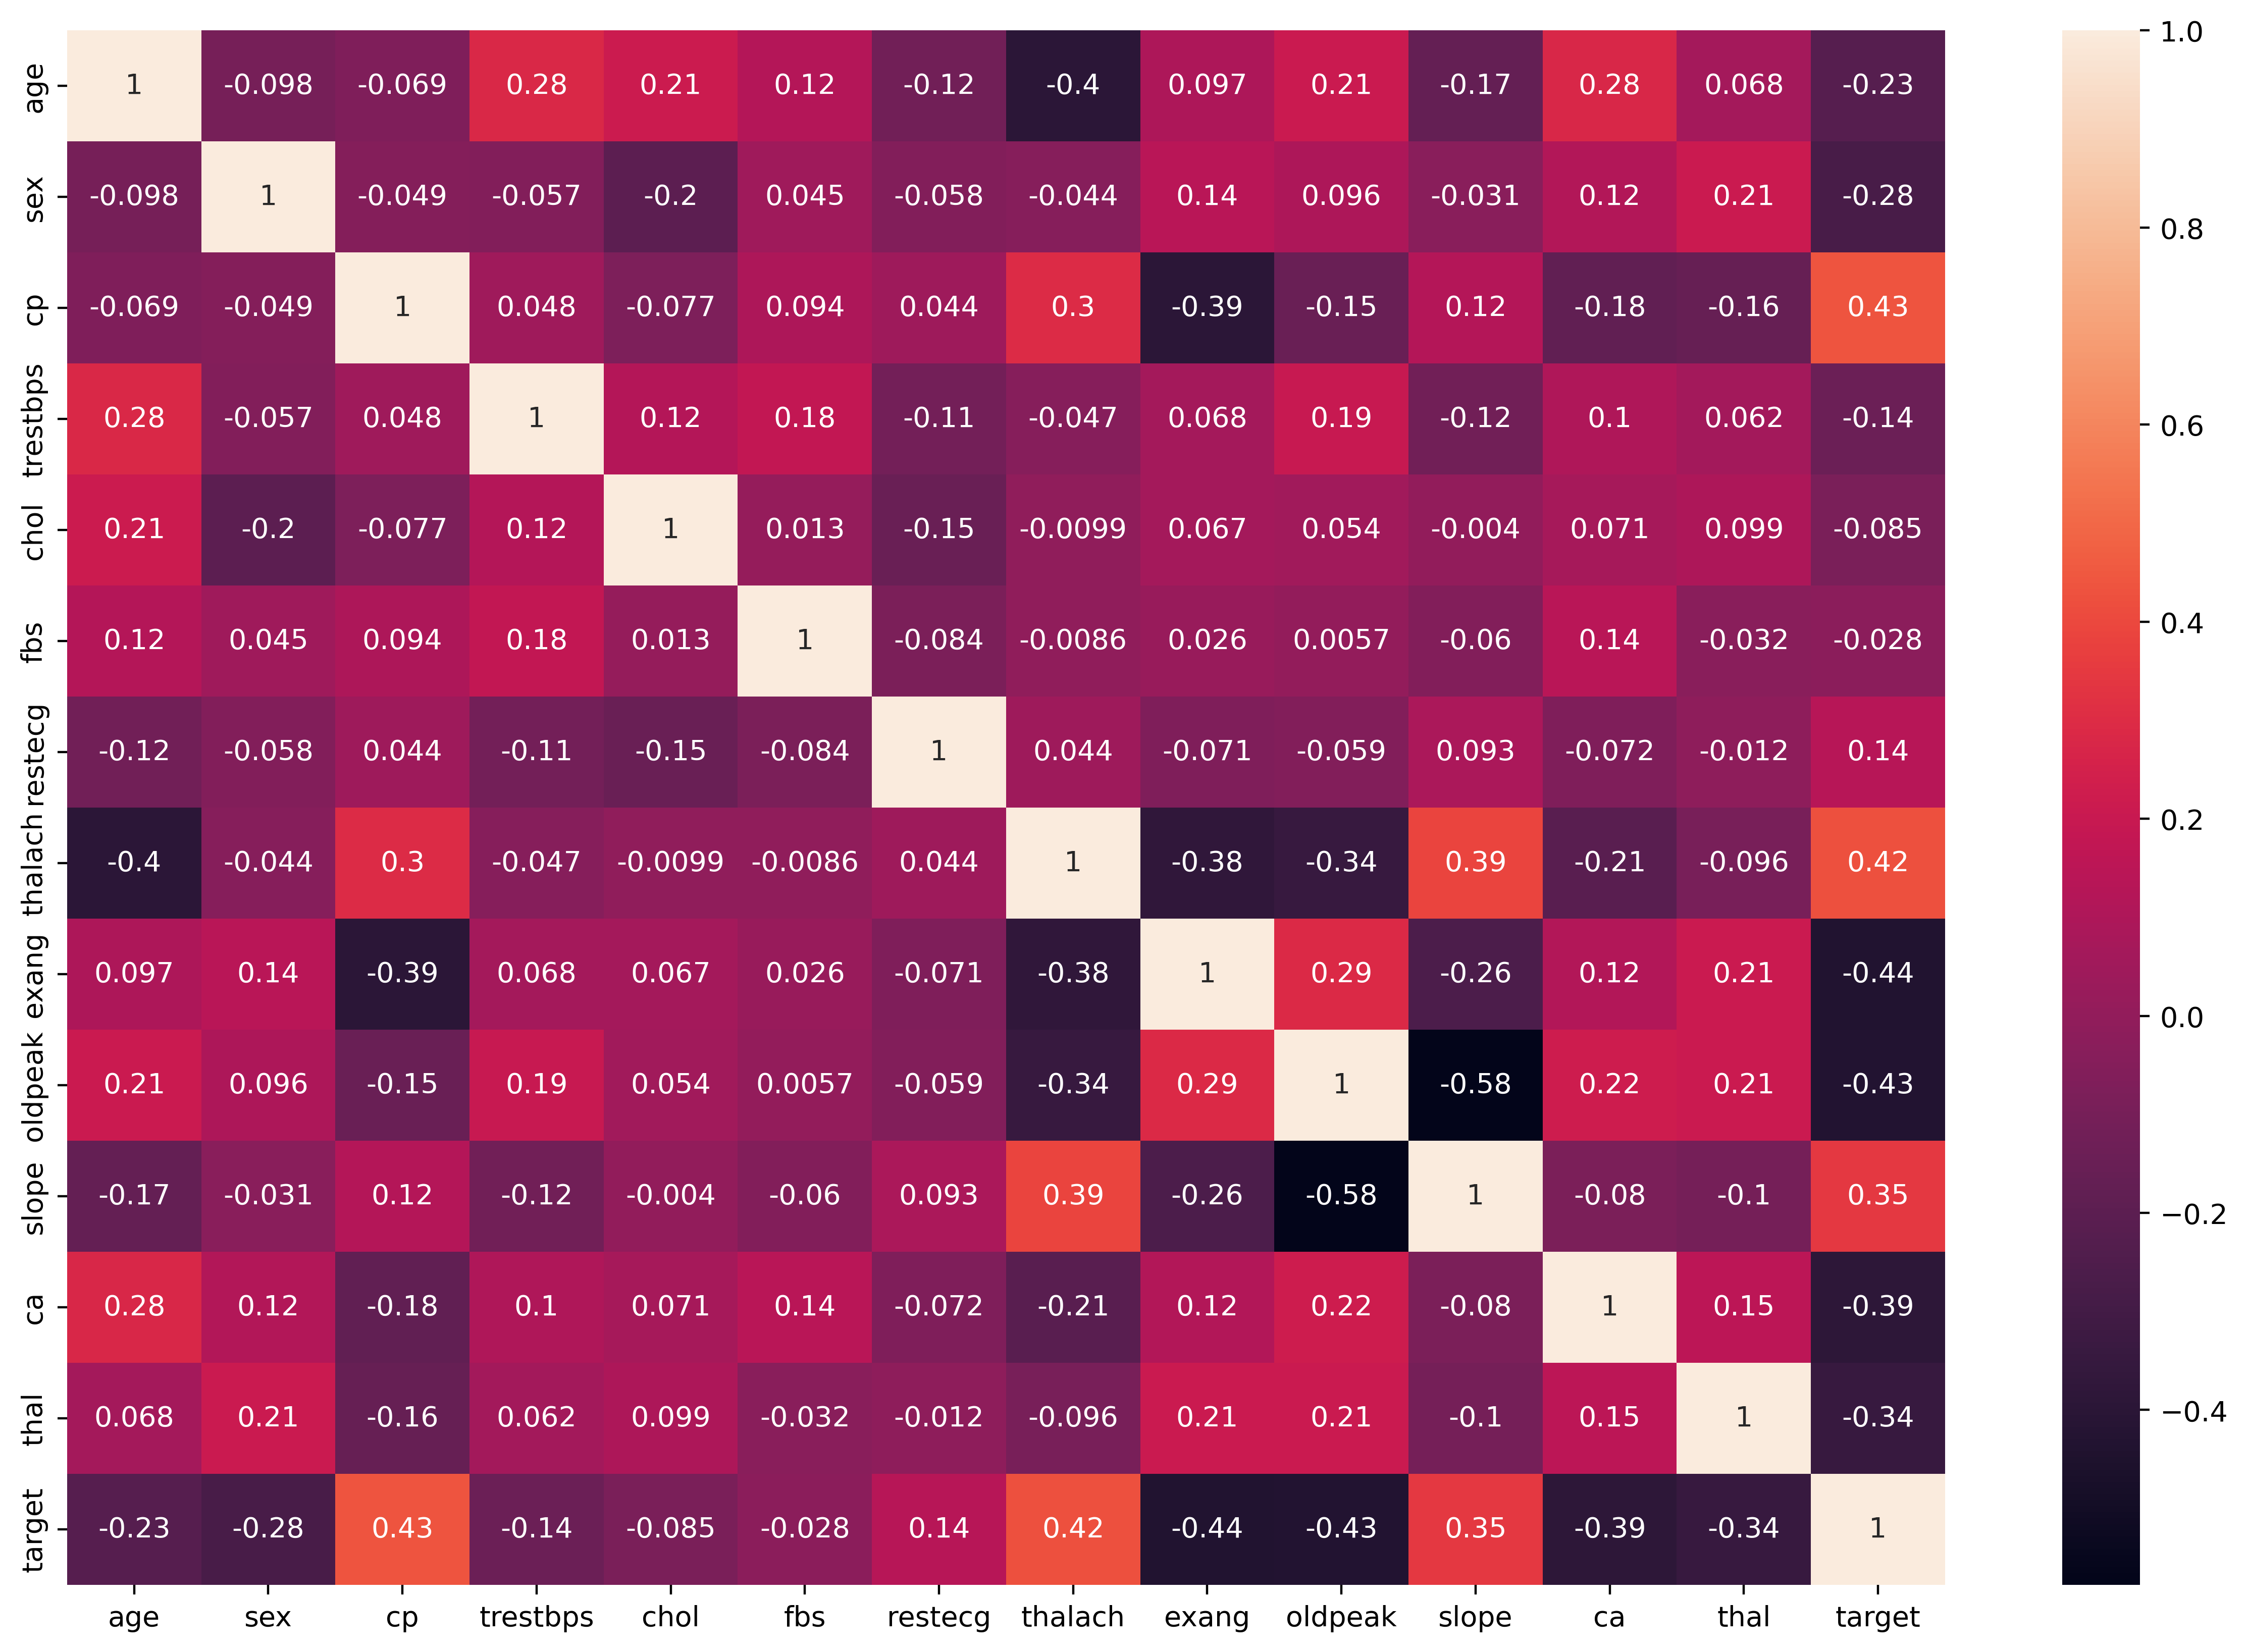

In [11]:
plt.figure(figsize=(15,10), dpi=400)
sns.heatmap(df.corr(), annot=True)

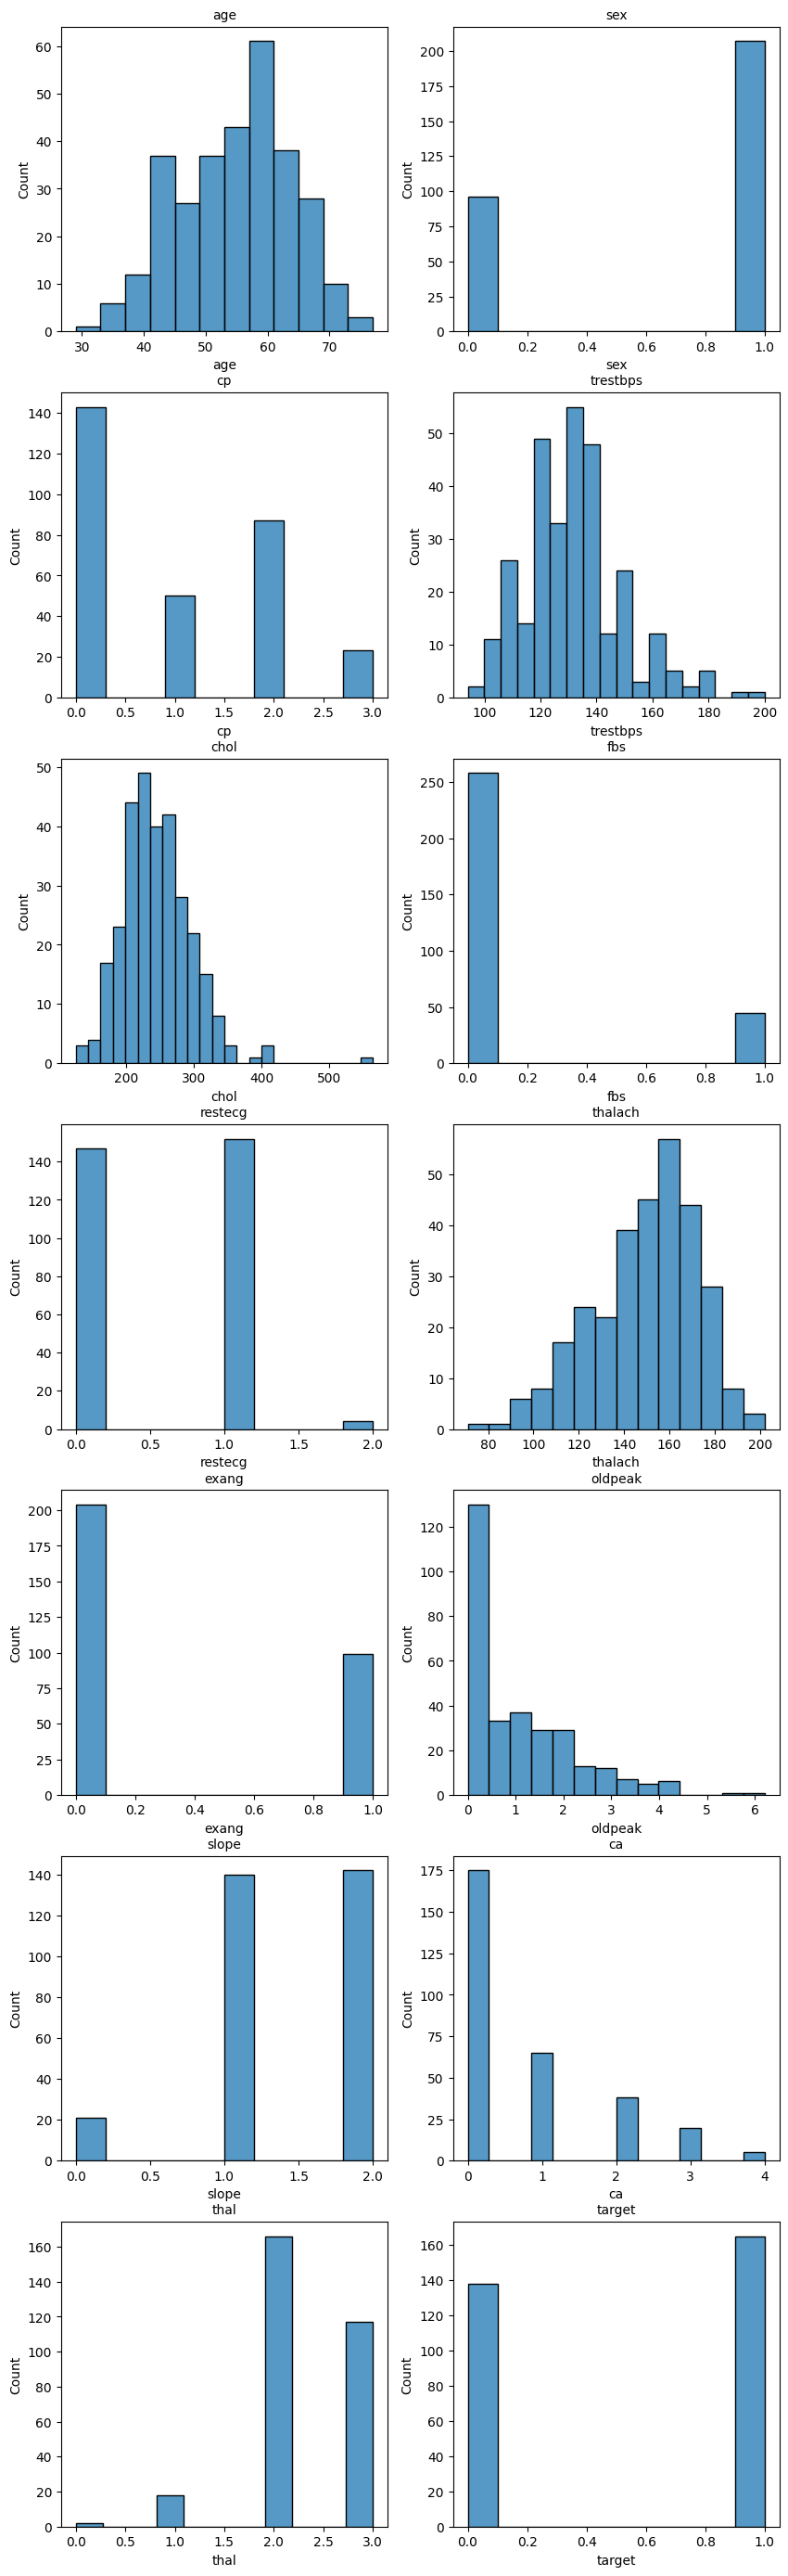

In [27]:
no_of_figure = len(df.columns)-1
fig,axes = plt.subplots(nrows=(no_of_figure+1)//2,ncols=2, figsize=(10,35))
for i , col in enumerate(df.columns):
    row_idx, col_idx = divmod(i, 2) 
    sns.histplot(x=col, data=df, ax=axes[row_idx,col_idx])
    axes[row_idx][col_idx].set_title(col, fontsize=10)

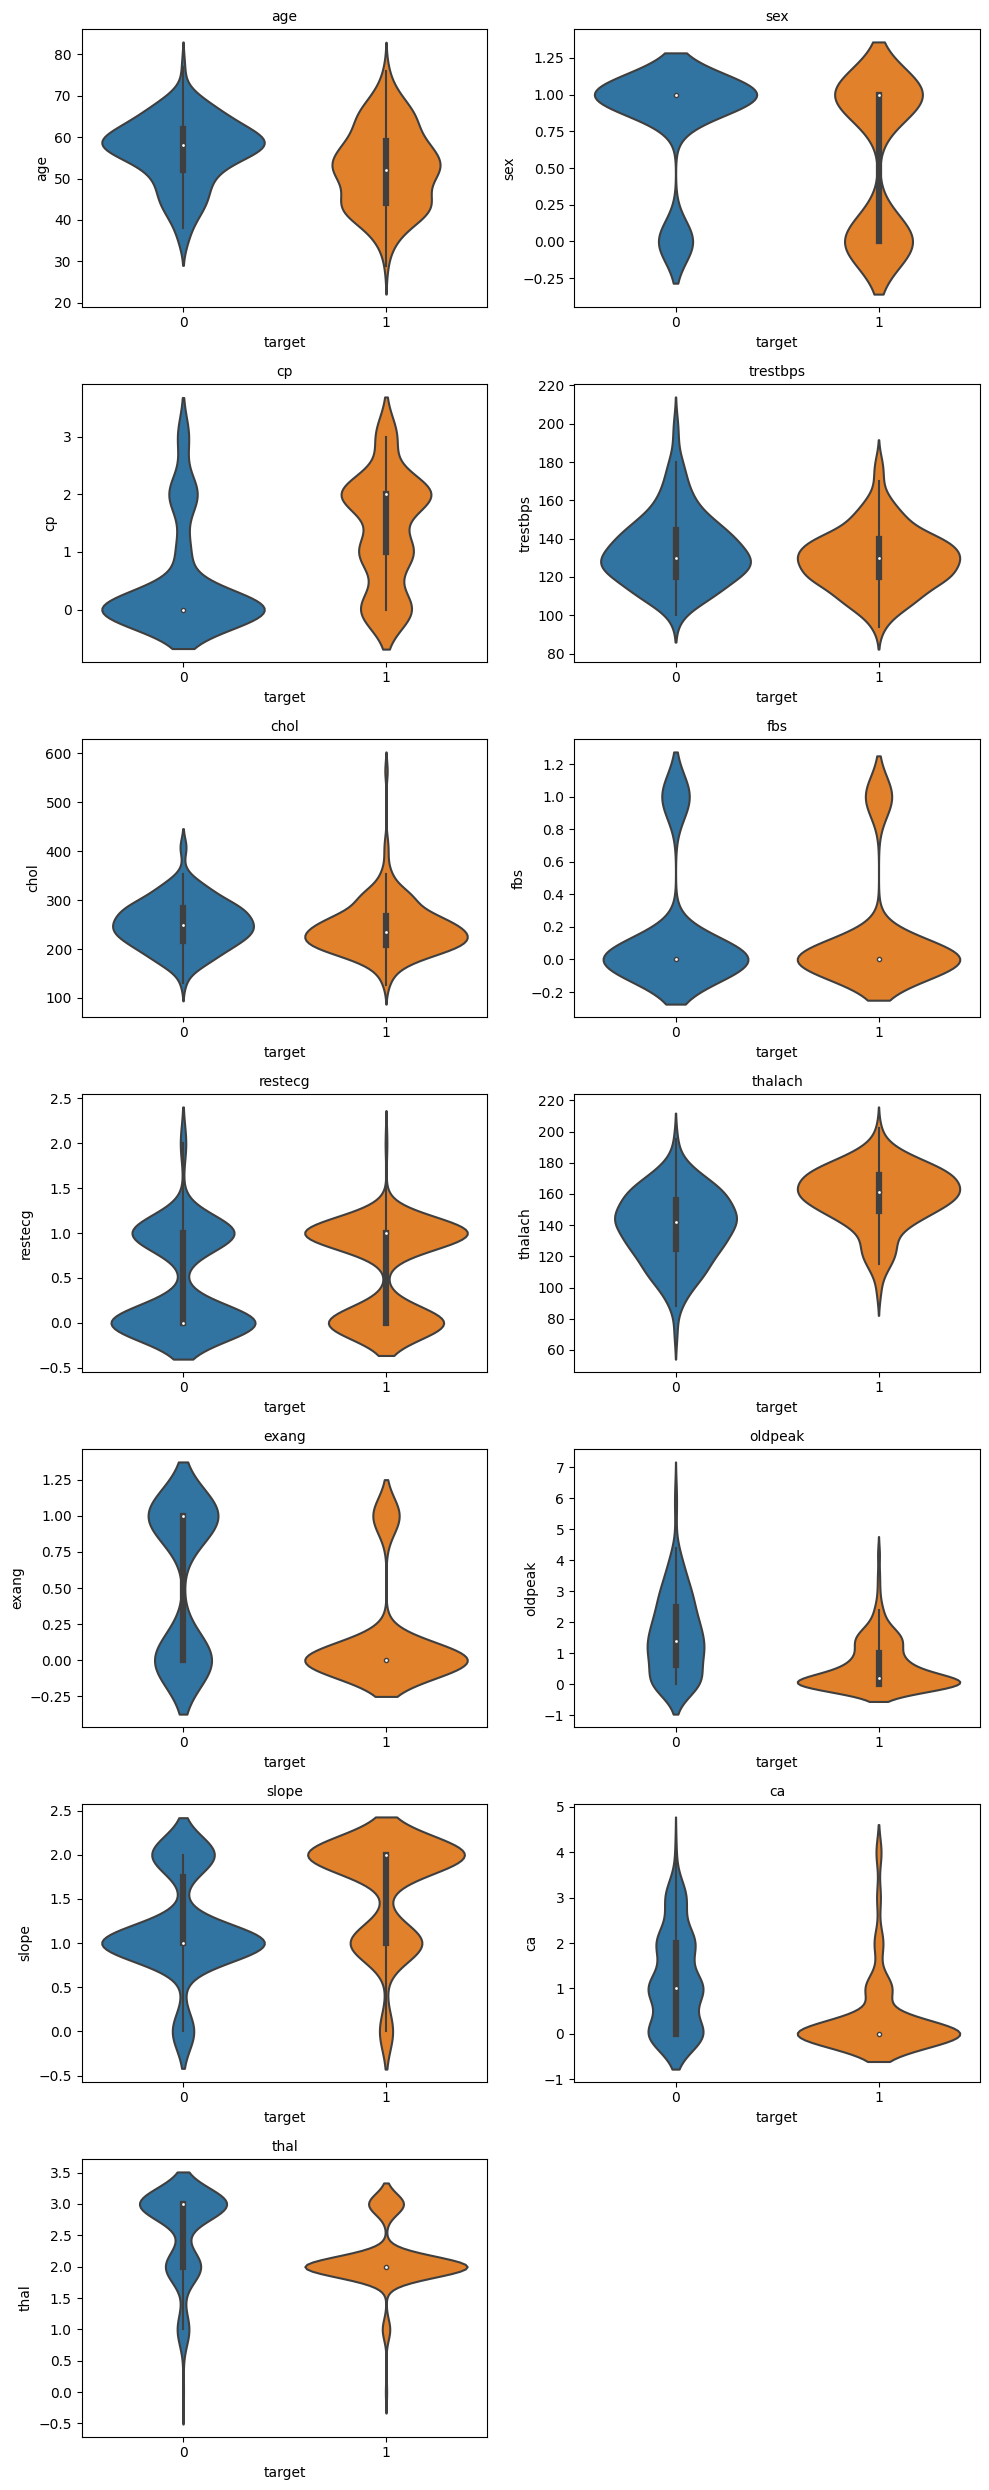

In [21]:
no_of_figure = len(df.columns)-1
fig, axes = plt.subplots(nrows=(no_of_figure+1)//2, ncols=2, figsize=(10,25))
for i, col in enumerate(df.columns[:-1]):
    row_idx, col_idx = divmod(i, 2) 
    sns.violinplot(x='target', y=col, data=df, ax=axes[row_idx][col_idx])
    axes[row_idx][col_idx].set_title(col, fontsize=10)
    
# Delete unused subplots
if no_of_figure % 2 == 1:
    fig.delaxes(axes[-1,-1])

plt.tight_layout()



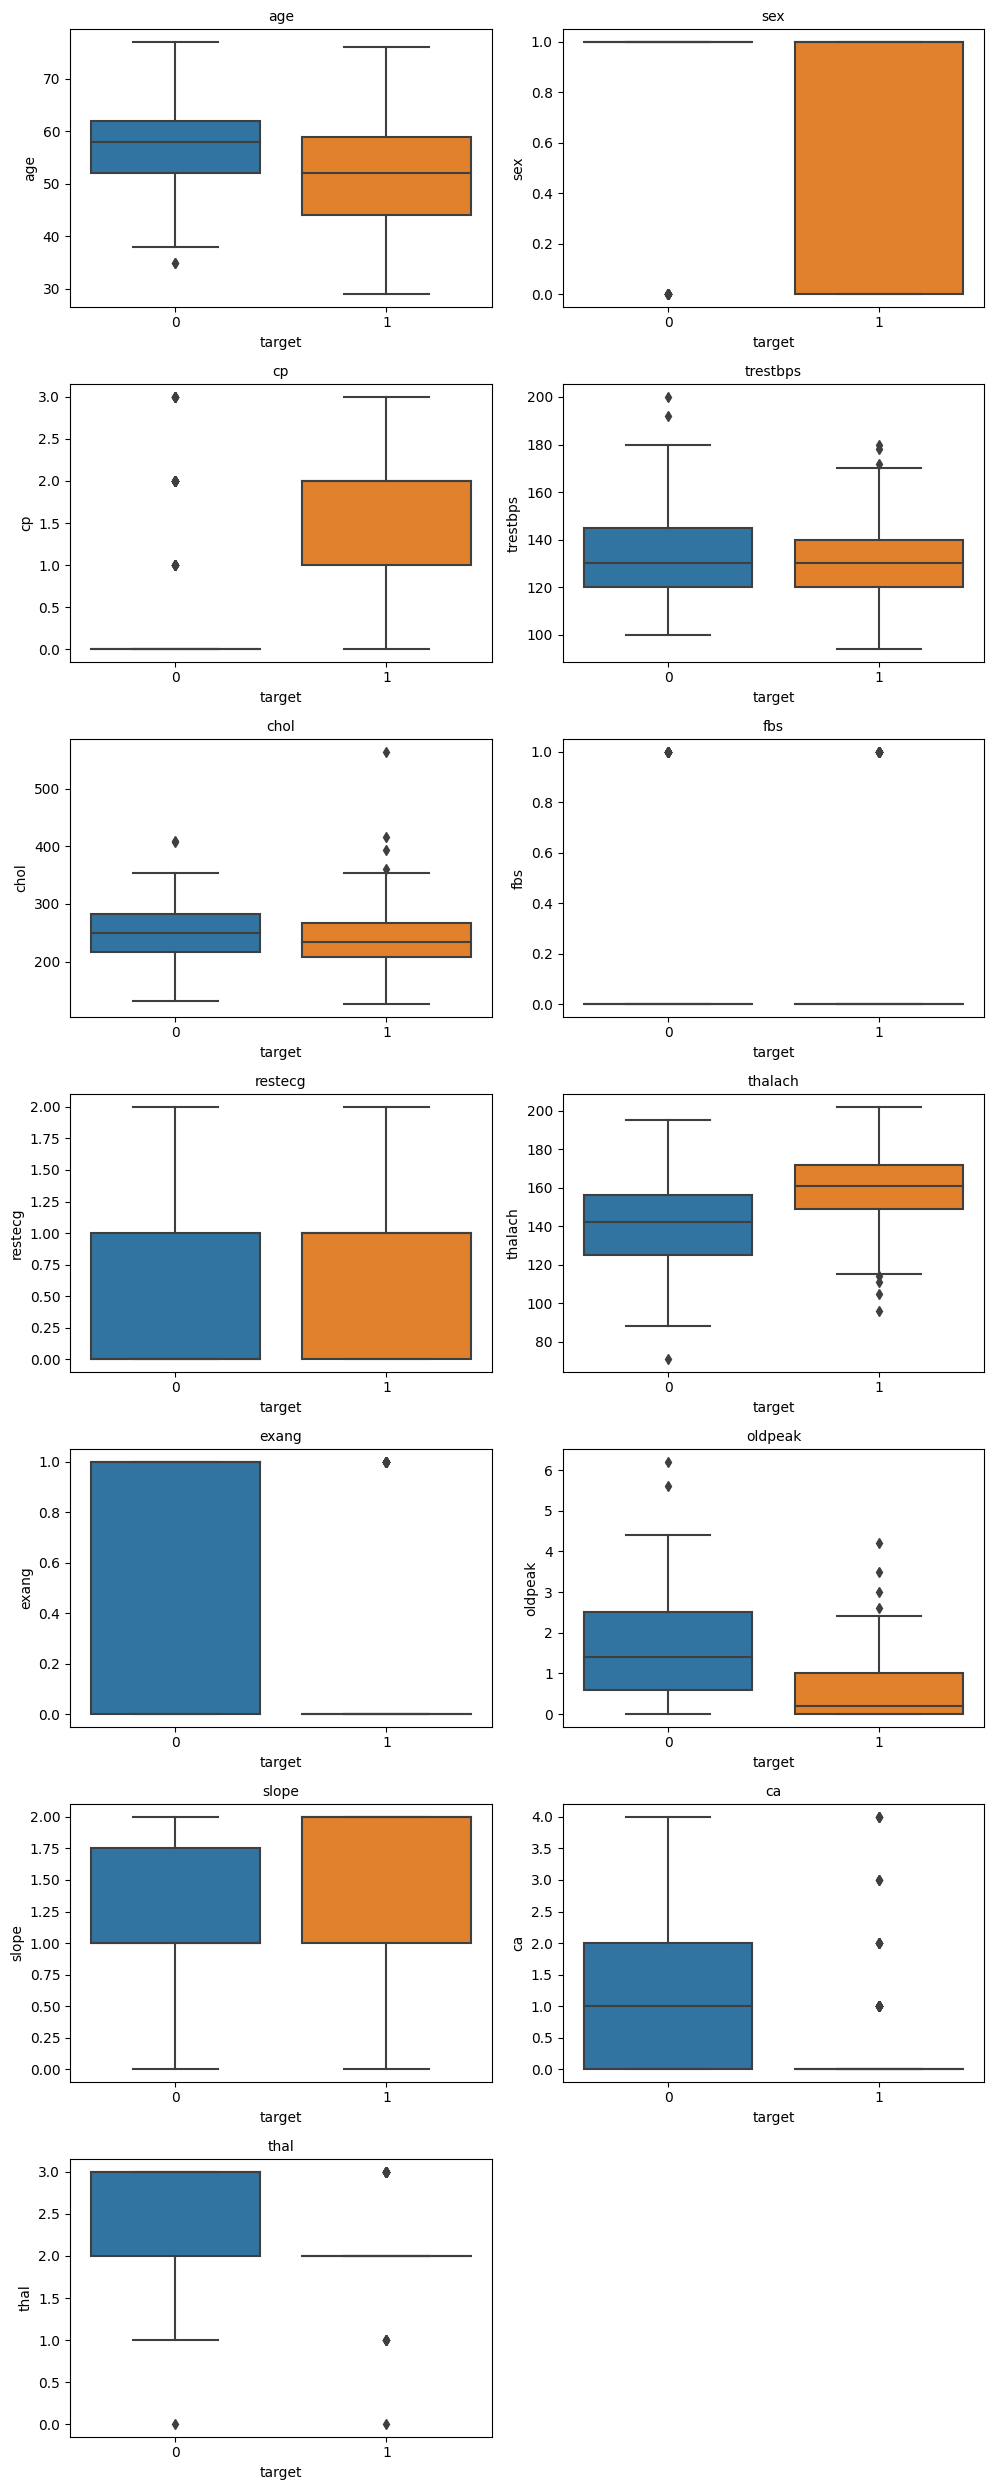

In [22]:
no_of_figure = len(df.columns)-1
fig, axes = plt.subplots(nrows=(no_of_figure+1)//2, ncols=2, figsize=(10,25))
for i, col in enumerate(df.columns[:-1]):
    row_idx, col_idx = divmod(i, 2) 
    sns.boxplot(x='target', y=col, data=df, ax=axes[row_idx][col_idx])
    axes[row_idx][col_idx].set_title(col, fontsize=10)
    
# Delete unused subplots
if no_of_figure % 2 == 1:
    fig.delaxes(axes[-1,-1])

plt.tight_layout()

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Some of the upper distribution does not make sense, so we need some other plot to visualize the Dataset better

In [28]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

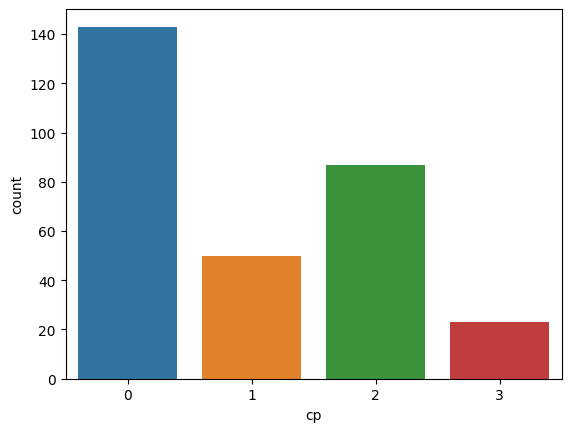

In [36]:
sns.countplot(x='cp',data=df)

In [37]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

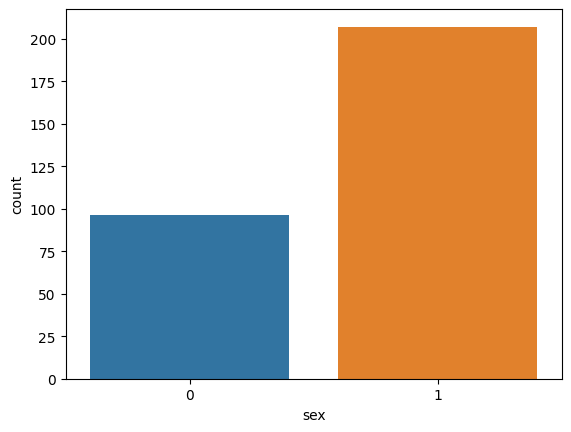

In [38]:
sns.countplot(x='sex', data=df)

In [39]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<Axes: xlabel='fbs', ylabel='count'>

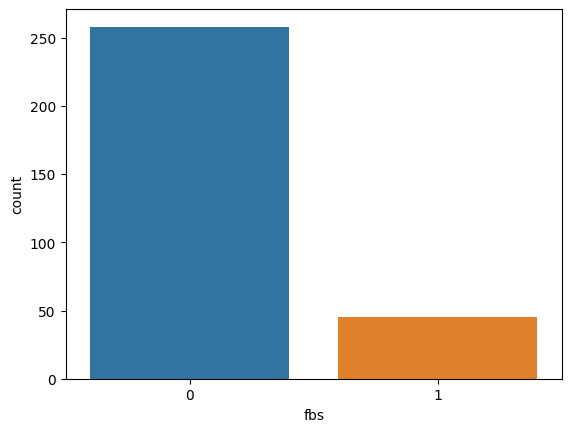

In [40]:
sns.countplot(x='fbs', data=df)

In [41]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

<Axes: xlabel='exang', ylabel='count'>

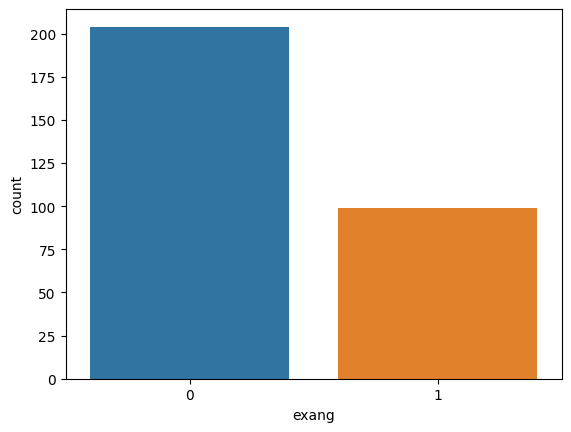

In [42]:
sns.countplot(x='exang', data=df)

In [45]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<Axes: xlabel='ca', ylabel='count'>

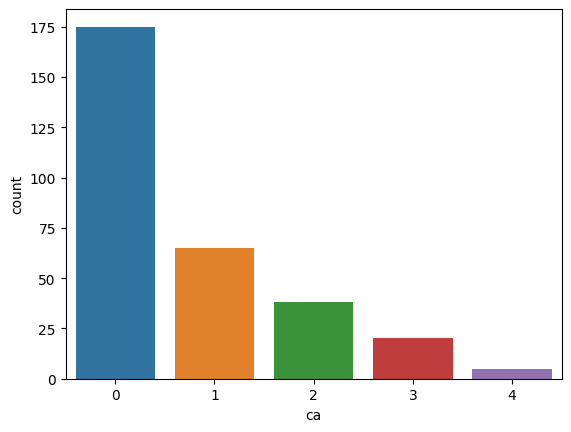

In [46]:
sns.countplot(x='ca', data=df)

<Axes: xlabel='thal', ylabel='count'>

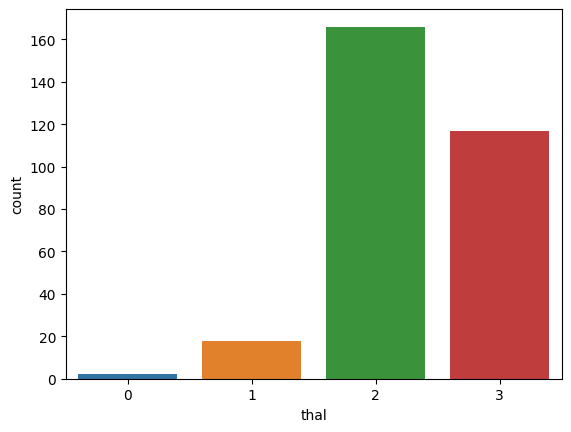

In [49]:
sns.countplot(x='thal', data=df)

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('target', axis=1)
y= df['target']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model = LogisticRegression(max_iter=10000)

In [59]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [60]:
y_pred = log_model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc

In [65]:
accuracy_score(y_test,y_pred)

0.8571428571428571

In [66]:
confusion_matrix(y_test,y_pred)

array([[34, 10],
       [ 3, 44]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91



#Accuracyt of 85% is a decent value in Logistics regg. so we can proceed to deploy futher